## Exploratory Data Analysis

- Explore the provided data set using descriptive statistics (e.g. mean values, standard deviations, min/max values, missing values) and visualizations (e.g. histograms, boxplots)
- Present the insights you gained from exploration
- Also point out which data quality issues you identified in terms of: 
    - Missing values 
    - Outliers
    - Features to be transformed (e.g normalization) transformation
    - Features to be removed (feature selection)
    - Other insights which require attention in the following phases
- Document and present your learnings from the coding for this task

In [188]:
import pandas as pd
import numpy as np
import missingno as msno

In [189]:
df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")

## Overview

In [190]:
# Rename columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             978 non-null    object 
 1   age_of_customer                978 non-null    float64
 2   sex                            978 non-null    object 
 3   ctry                           978 non-null    object 
 4   town                           939 non-null    object 
 5   swimming_hours_per_week        978 non-null    float64
 6   biking_hours_per_week          954 non-null    float64
 7   running_hours_per_week         978 non-null    float64
 8   total_training_hours_per_week  978 non-null    float64
 9   vo2_max                        975 non-null    float64
 10  10k_running_time_prediction    978 non-null    float64
 11  calories_burned_per_week       959 non-null    float64
 12  support_cases_of_customer      978 non-null    fl

<Axes: >

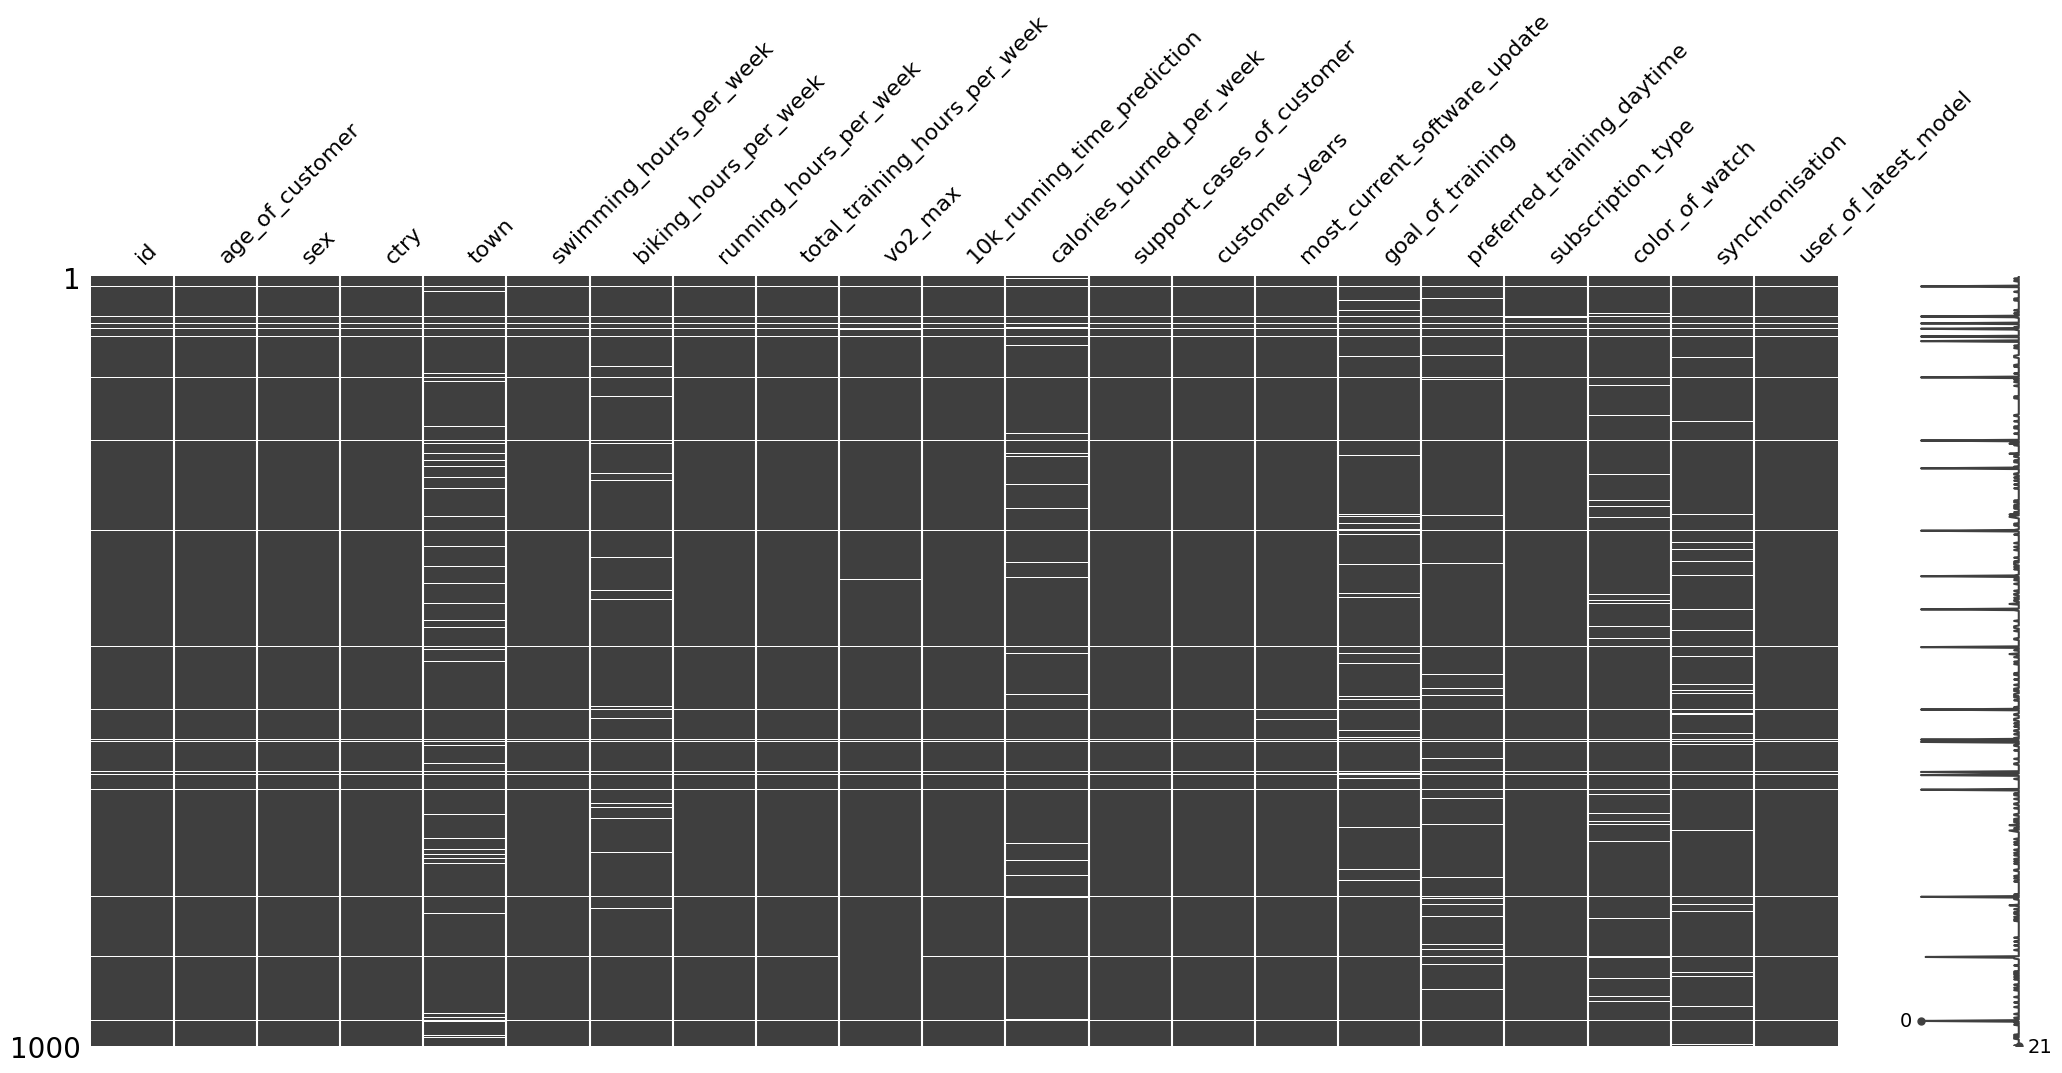

In [192]:
# Check for missing values
msno.matrix(df)

In [193]:
# Missing values in percentage
prc_missing_values = df.isna().sum()/len(df)*100
avg_missing_values = round(np.mean(prc_missing_values),2)

print("Percentage of missing values per columns")
print(prc_missing_values)
print()
print("Percentage of Average missing values: ", avg_missing_values, " %")

Percentage of missing values per columns
id                               2.2
age_of_customer                  2.2
sex                              2.2
ctry                             2.2
town                             6.1
swimming_hours_per_week          2.2
biking_hours_per_week            4.6
running_hours_per_week           2.2
total_training_hours_per_week    2.2
vo2_max                          2.5
10k_running_time_prediction      2.2
calories_burned_per_week         4.1
support_cases_of_customer        2.2
customer_years                   2.2
most_current_software_update     2.3
goal_of_training                 5.0
preferred_training_daytime       4.6
subscription_type                2.3
color_of_watch                   5.4
synchronisation                  5.0
user_of_latest_model             2.2
dtype: float64

Percentage of Average missing values:  3.15  %


In [194]:
category_columns = list(df.describe(include='object').columns)
category_columns.remove('id')
category_columns.remove('most_current_software_update')
category_columns.remove('synchronisation')
date_columns = ['most_current_software_update']
bool_columns = ['synchronisation']
target_columns = ['user_of_latest_model']
numeric_columns = df.describe().columns
numeric_columns = [x for x in numeric_columns if x not in target_columns]
text_columns = ['id']

print("Category Columns:", category_columns)
print("Date Columns:", date_columns)
print("Boolean Columns:", bool_columns)
print("Numeric Columns:", numeric_columns)
print("Text Columns:", text_columns)
print("Target Columns:", target_columns)

for bool_column in bool_columns:
    df[bool_column] = df[bool_column].map({'Yes': 1, 'No': 0})


Category Columns: ['sex', 'ctry', 'town', 'goal_of_training', 'preferred_training_daytime', 'subscription_type', 'color_of_watch']
Date Columns: ['most_current_software_update']
Boolean Columns: ['synchronisation']
Numeric Columns: ['age_of_customer', 'swimming_hours_per_week', 'biking_hours_per_week', 'running_hours_per_week', 'total_training_hours_per_week', 'vo2_max', '10k_running_time_prediction', 'calories_burned_per_week', 'support_cases_of_customer', 'customer_years']
Text Columns: ['id']
Target Columns: ['user_of_latest_model']


In [195]:
df.filter(numeric_columns).describe()

,age_of_customer,swimming_hours_per_week,biking_hours_per_week,running_hours_per_week,total_training_hours_per_week,vo2_max,10k_running_time_prediction,calories_burned_per_week,support_cases_of_customer,customer_years
count,978.000000,978.000000,954.000000,978.000000,978.000000,975.000000,978.000000,959.000000,978.000000,978.000000
mean,40.529652,2.226196,5.529109,3.262219,11.446155,51.374066,45.610521,5487.534849,1.956033,3.792434
std,14.072180,1.595254,3.499372,2.165709,8.038531,21.459113,7.549771,2499.741648,1.413167,2.916593
min,-1.000000,0.000000,0.000000,0.000000,0.150000,10.220000,29.120000,-47.260000,0.000000,0.000000
25%,29.000000,1.020000,2.767500,1.635000,7.380000,42.070000,40.302500,3661.940000,1.000000,1.000000
50%,41.000000,2.020000,5.110000,2.930000,10.220000,53.400000,43.885000,5168.410000,2.000000,3.000000
75%,53.000000,3.187500,7.870000,4.600000,14.097500,60.095000,50.257500,7000.840000,3.000000,6.000000
max,64.000000,9.970000,16.110000,11.870000,100.000000,247.257800,67.060000,13280.060000,4.000000,11.000000


array([[<Axes: title={'center': 'age_of_customer'}>,
        <Axes: title={'center': 'swimming_hours_per_week'}>,
        <Axes: title={'center': 'biking_hours_per_week'}>],
       [<Axes: title={'center': 'running_hours_per_week'}>,
        <Axes: title={'center': 'total_training_hours_per_week'}>,
        <Axes: title={'center': 'vo2_max'}>],
       [<Axes: title={'center': '10k_running_time_prediction'}>,
        <Axes: title={'center': 'calories_burned_per_week'}>,
        <Axes: title={'center': 'support_cases_of_customer'}>],
       [<Axes: title={'center': 'customer_years'}>,
        <Axes: title={'center': 'synchronisation'}>,
        <Axes: title={'center': 'user_of_latest_model'}>]], dtype=object)

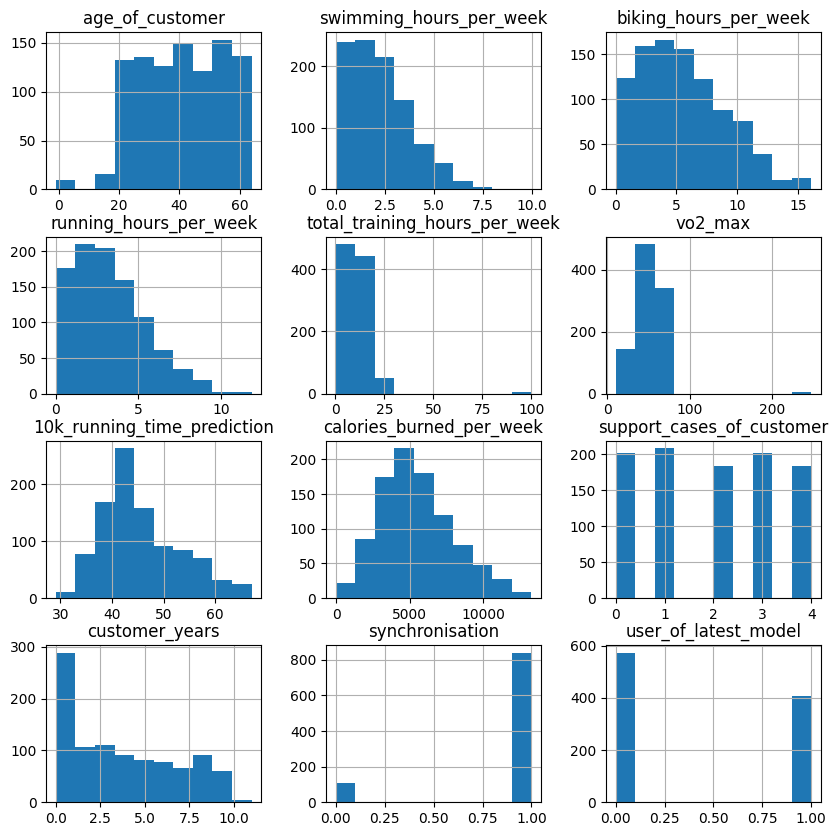

In [196]:
df.hist(figsize=(10,10))

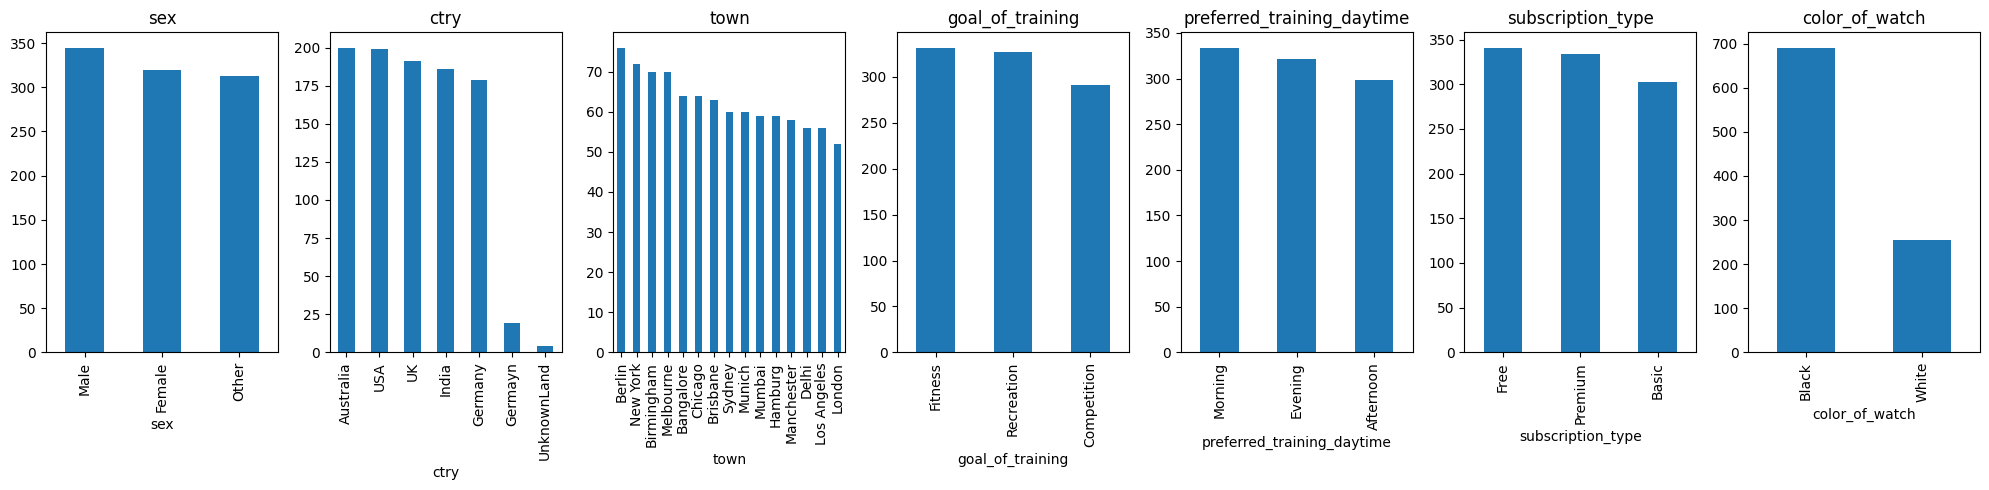

In [197]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, len(category_columns), figsize=(20, 5))
for col in category_columns:
    df[col].value_counts().plot(kind='bar', ax=ax[category_columns.index(col)], title=col)
fig.tight_layout()


In [198]:
df.describe(include='object')

,id,sex,ctry,town,most_current_software_update,goal_of_training,preferred_training_daytime,subscription_type,color_of_watch
count,978,978,978,939,977,950,954,977,946
unique,971,3,7,15,393,3,3,3,2
top,C0708,Male,Australia,Berlin,2023-12-08,Fitness,Morning,Free,Black
freq,2,345,200,76,9,332,334,341,691


**Summary**

- The dataframe contains 20 columns. 
- There are in total 1000 observations.
- The average missing data per column is 3.1%.

- Column Types:
    - **Category Columns**: ['Sex', 'Ctry', 'Town', 'Goal of Training', 'Preferred Training Daytime', 'Subscription Type', 'Color of Watch']
    - **Date Columns**: ['Most current software update']
    - **Boolean Columns**: ['Synchronisation']
    - **Numeric Columns**: ['Age of customer', 'Swimming Hours per Week', 'Biking Hours per Week',
       'Running Hours per Week', 'Total Training Hours per Week', 'VO2 Max',
       '10k Running Time Prediction', 'Calories Burned per Week',
       'Support Cases of Customer', 'Customer Years', 'User of latest model']
    - **Text Columns**: ['ID'] 
    - **Target Columns**: ['User of latest model']

- For the numeric columns only the '10k Running Time Prediction', 'Calories Burned per Week' seem to follow a normal distribution. 
- For the category column Town, there seems to be a data quality issue for the entry "Germany" and "Germanyn". The rest of the category columns seems to good representation of data points per category, i.e. no imbalance datasets.
- The variables 'total_training_hours_per_week' and 'vo2_max' show a right skew distribution which might point out the presence of outliers. 



## Data Quality

### Missing Values Imputation

<Axes: >

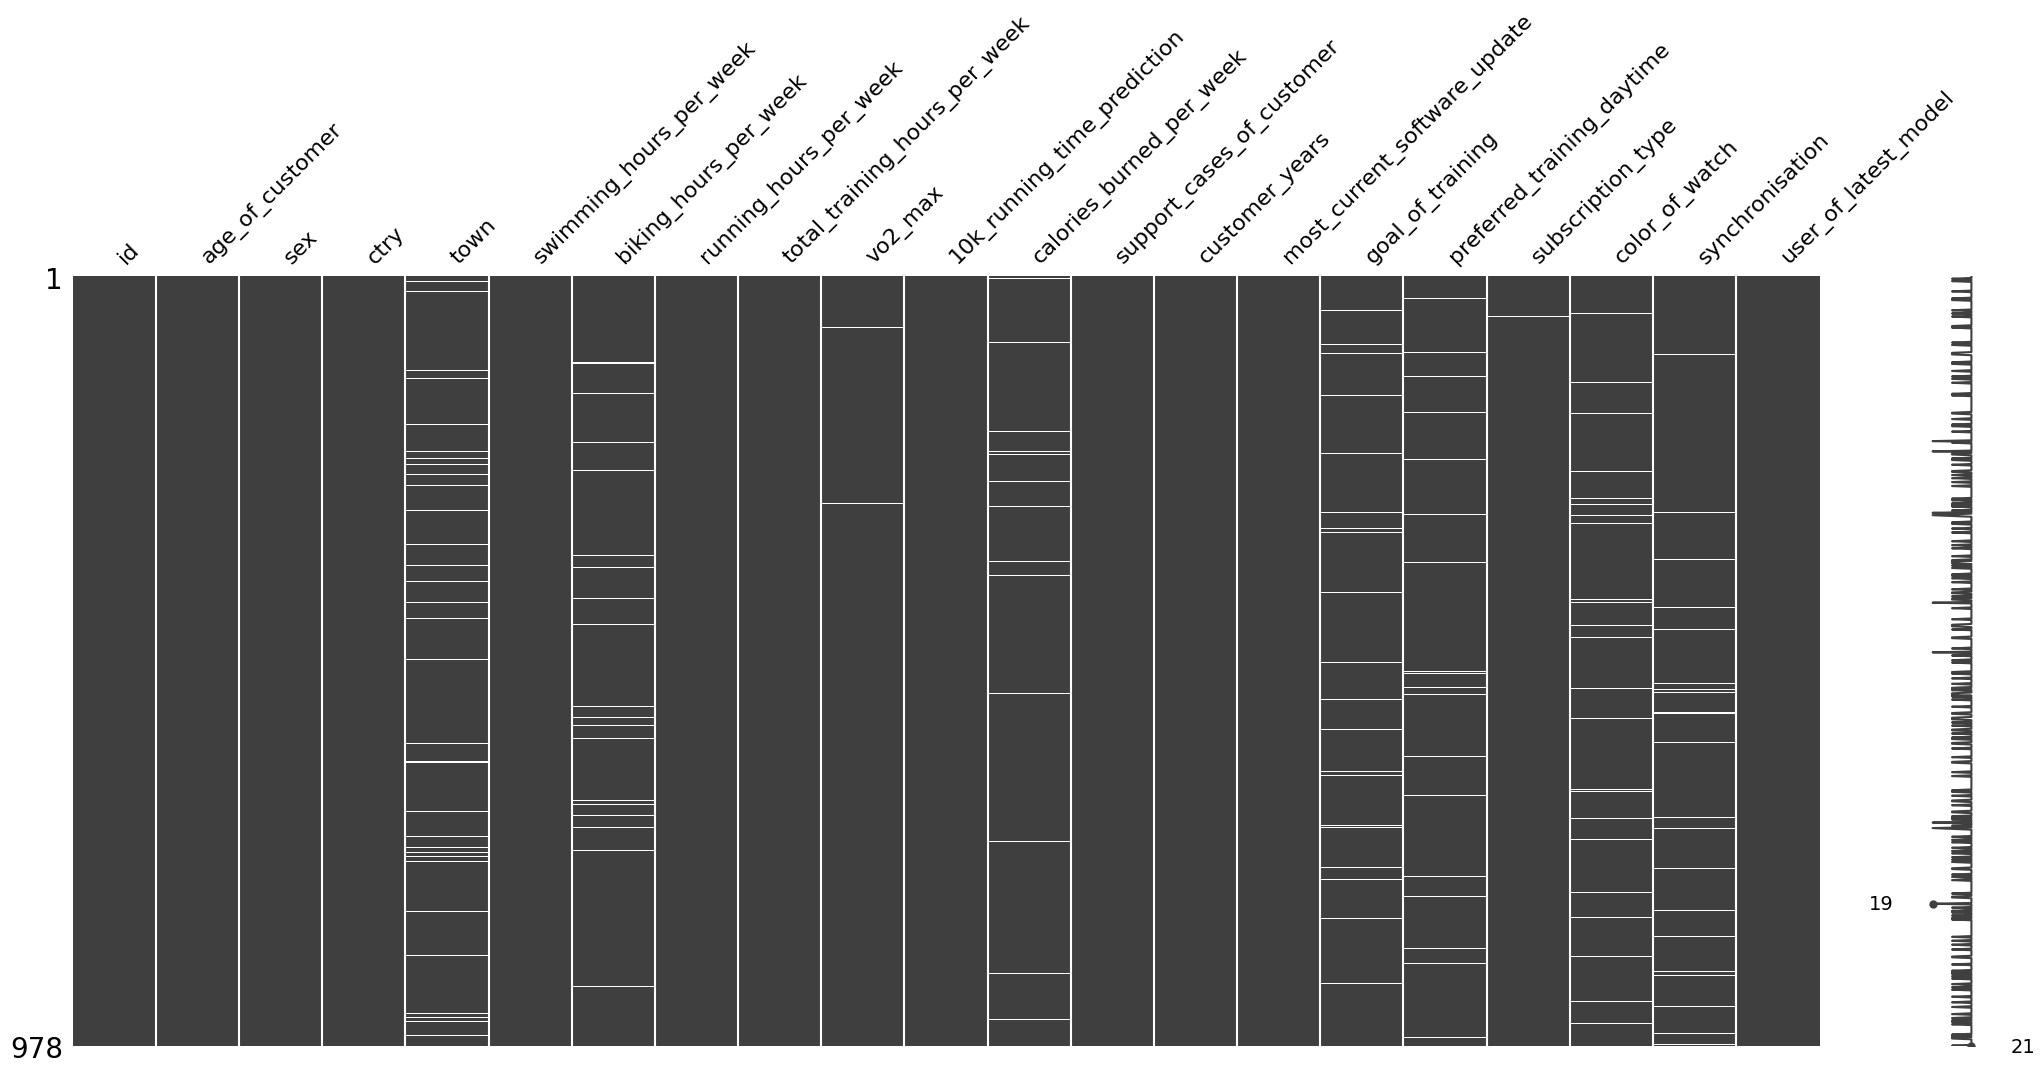

In [199]:
# Missing Value Handling - Deletion of entries with missing values in the target colunm
df=df.drop(df[df[target_columns[0]].isnull()].index)
msno.matrix(df)

<Axes: >

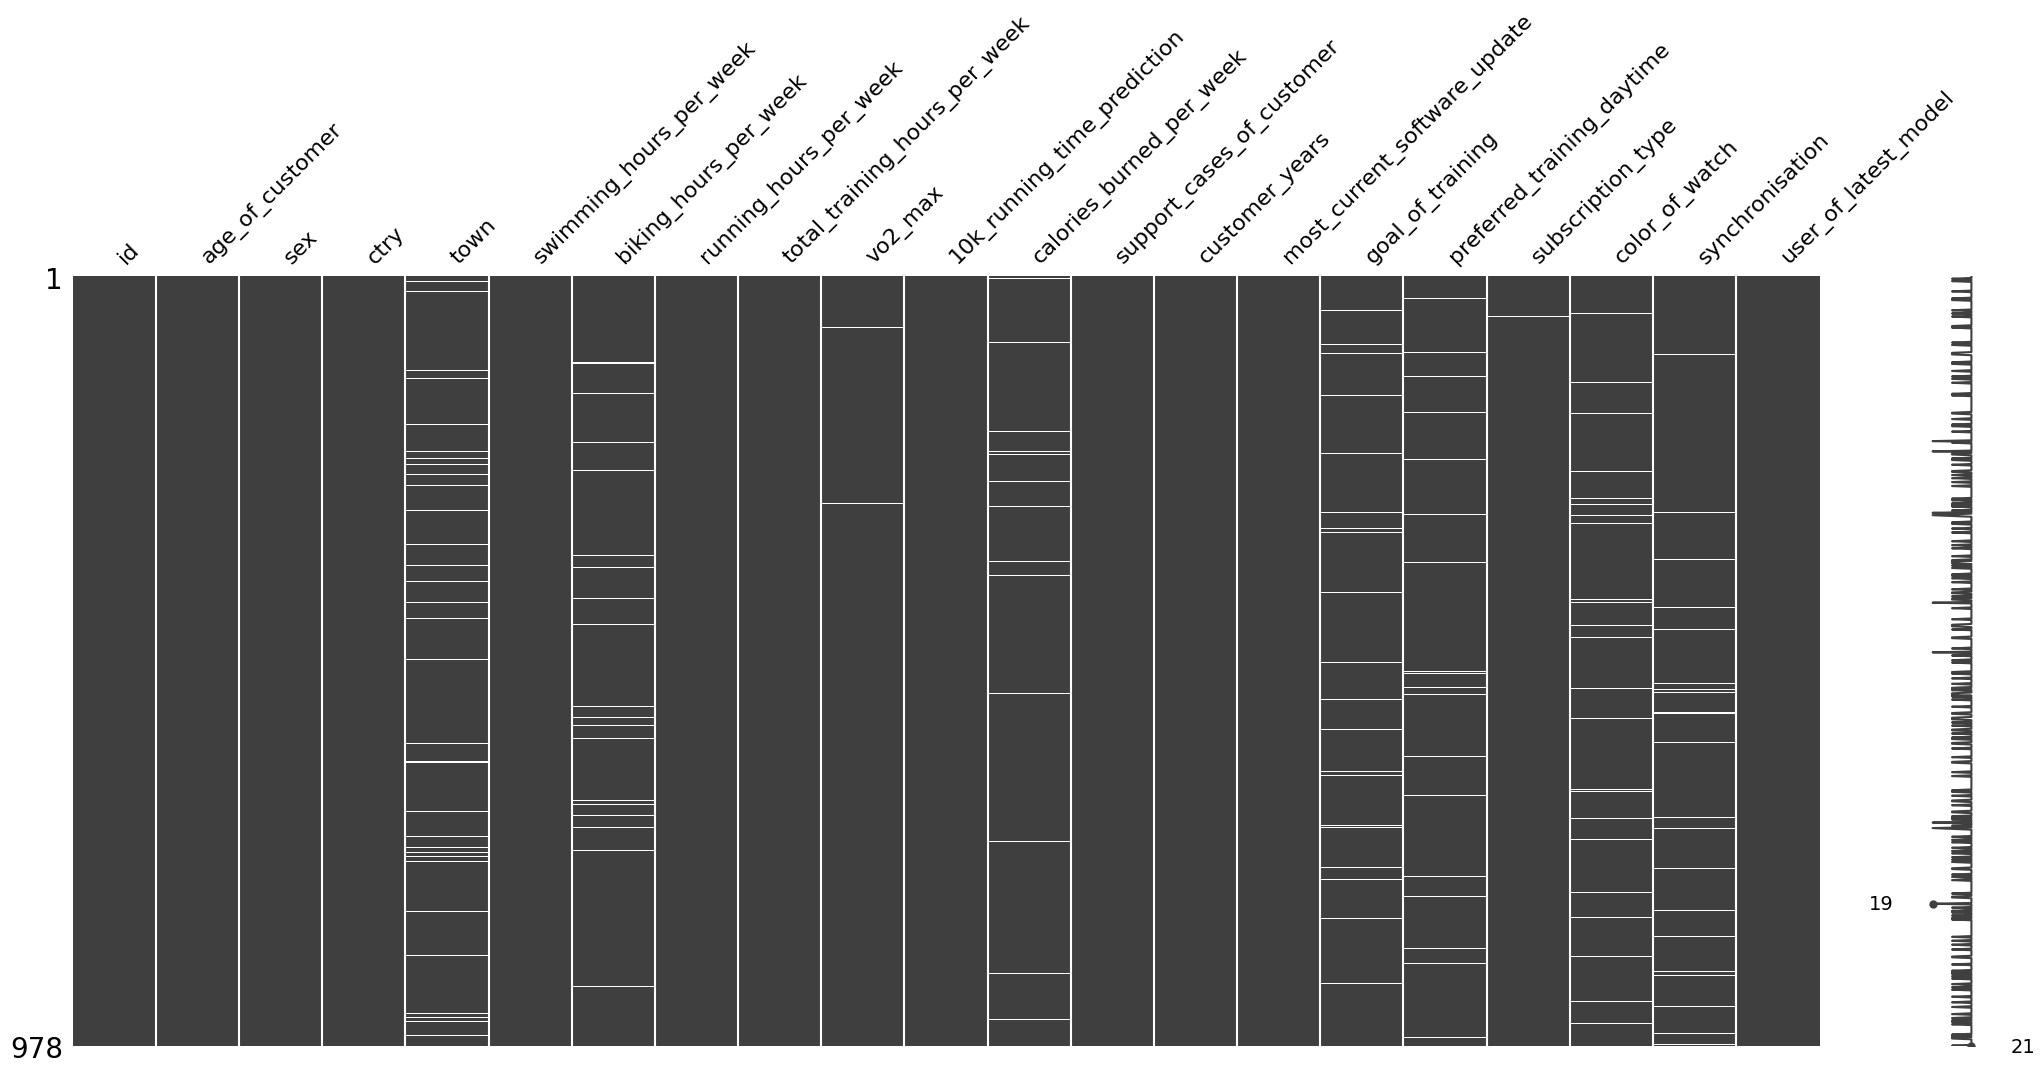

In [200]:
#Listwise deletion (all rows with multiple missing values)
df=df.drop(df[df.isnull().sum(axis=1)>2].index)
msno.matrix(df)

### Impute values for numerical columns

1) Use median imputation for Outliers. 
2) Use mean imputation for missing values after cleaning outliers. 

In [201]:
## Identify outliers with IQR methods and replace them with the median 
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df[col] = df[col].mask(outliers, np.nan)
    df[col] = df[col].fillna(df[col].median())

In [202]:
# Impute missing values in numeric columns with mean
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

<Axes: >

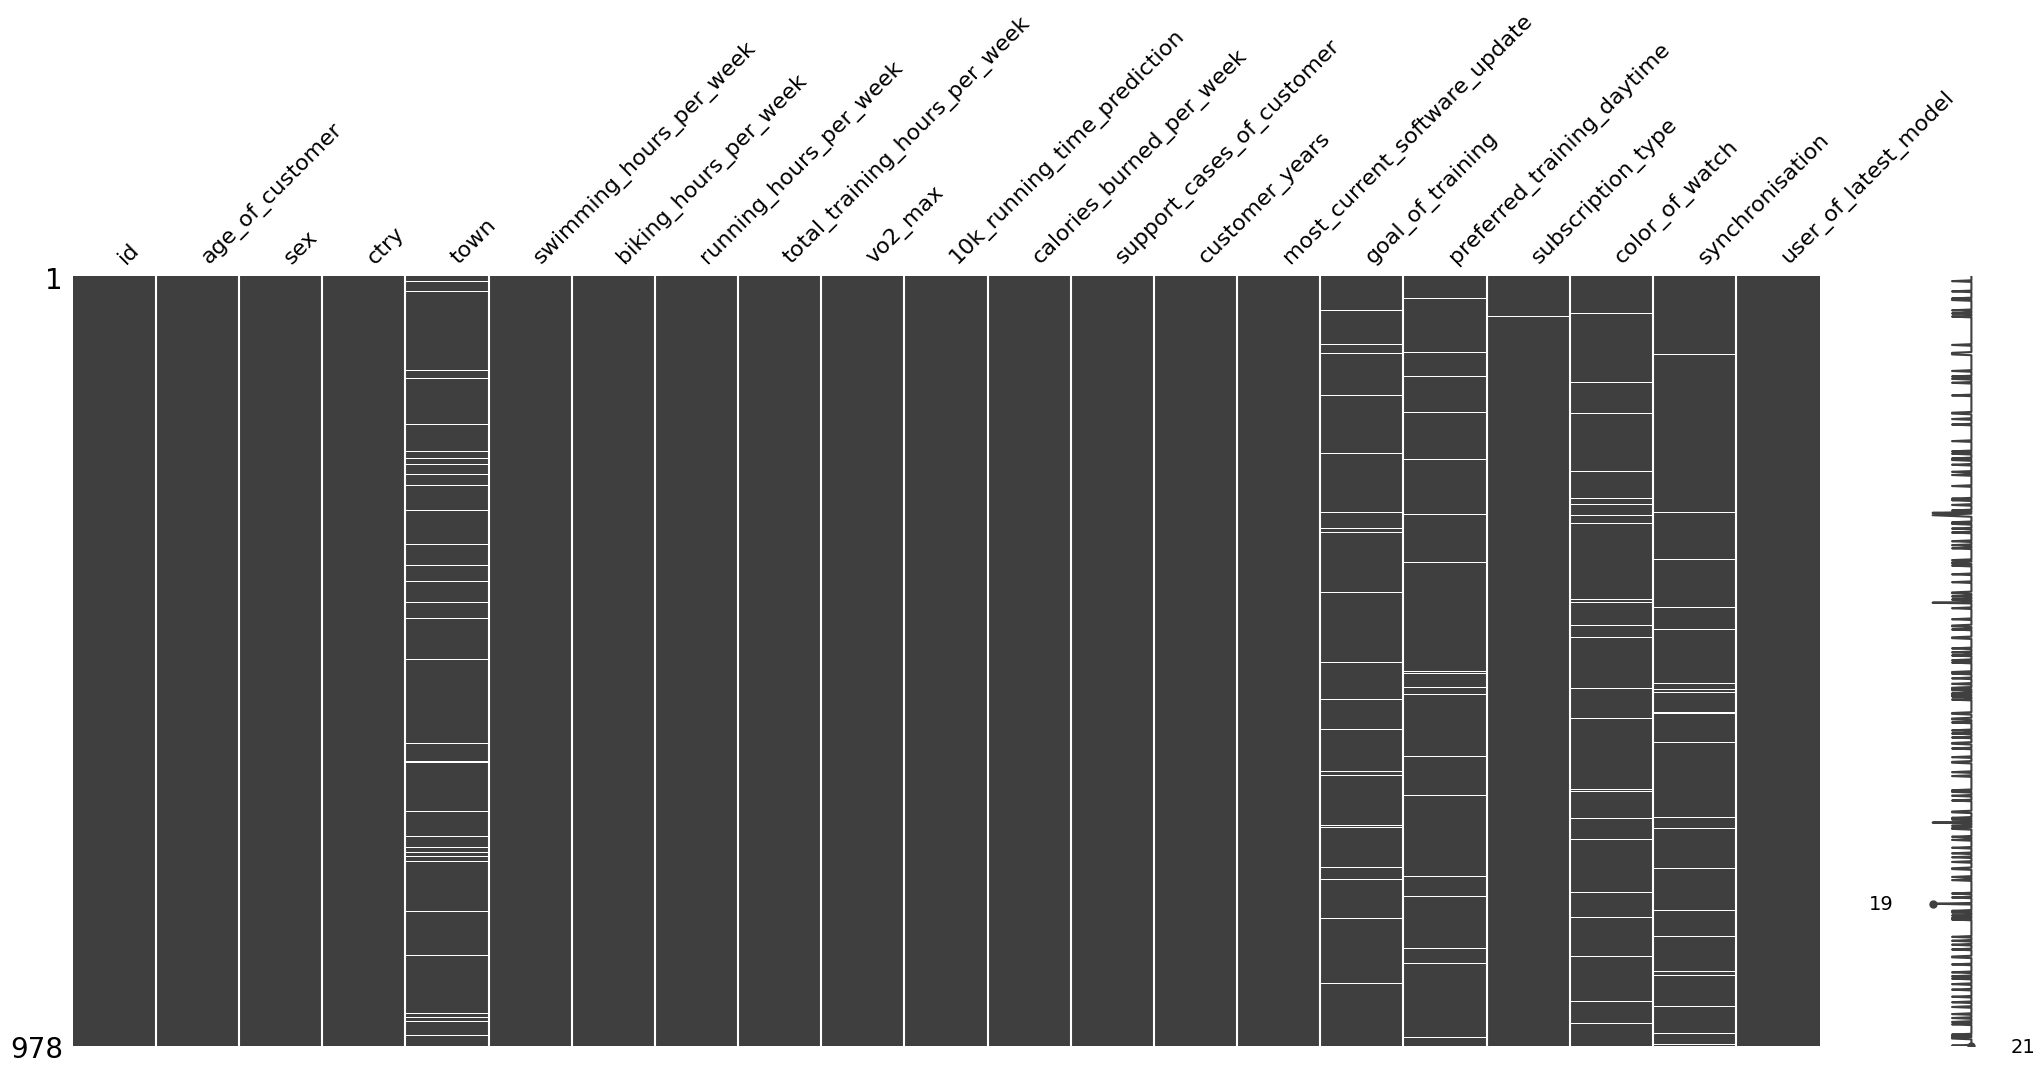

In [203]:
msno.matrix(df)

In [204]:
category_columns

['sex',
 'ctry',
 'town',
 'goal_of_training',
 'preferred_training_daytime',
 'subscription_type',
 'color_of_watch']

### Imputation for Category Columns

The categorical columns `synchronisation`, `subscription_type`, `color_of_watch`, `subscription_type`, `preferred_training_daytime`, 'goal_of_training` and `town` contain missing values. In order to keep the bias to the minimum there are multiple approaches to inpute the missing values for categorical columns: 

**Use the Mode (Most Frequent Category)**:
    - How it works: Replace missing values with the most frequent category in the column.
	- Pros: Simple and computationally efficient.
	- Cons: May introduce bias if the most frequent category is overrepresented.
	- Best Use Case: When the column has a clear dominant category

**Random Imputation from Existing Categories**
	•	How it works: Randomly assign a value from the existing categories (weighted by their distribution).
	•	Pros: Preserves the original distribution and reduces bias.
	•	Cons: Could introduce noise if the data has underlying relationships.
	•	Best Use Case: When preserving category proportions is essential

**Predictive Imputation**
	•	How it works: Use a machine learning model (e.g., logistic regression, decision tree) to predict the missing values based on other features.
	•	Pros: Incorporates relationships with other variables, potentially improving accuracy.
	•	Cons: Computationally intensive and may overfit, especially with small datasets.
	•	Best Use Case: When other features provide strong signals for the missing values

**K-Nearest Neighbors (KNN) Imputation**
	•	How it works: Assign the most frequent category among the k-nearest neighbors (based on feature similarity).
	•	Pros: Preserves local patterns in the data.
	•	Cons: Computationally expensive and sensitive to distance metrics.
	•	Best Use Case: When the data has clusters or local structure

**Custom Category for Missing Values**
	•	How it works: Create a new category, such as “Unknown” or “Missing.”
	•	Pros: Keeps the missing values identifiable and avoids assumptions.
	•	Cons: Can introduce a new, potentially non-informative category that might affect models.
	•	Best Use Case: When missing values are meaningful (e.g., indicating a lack of information).

Therefore we will define a threshold, so that if the number of missing values is less than 5% we will impute the mode category. Otherwise we will use predictive imputation based on the Anova-Test. 

In [205]:
# perform chi-squared test for nominal features
from scipy.stats import chi2_contingency

columns = df.columns

#create a new dataframe which contains chi2 values for all feature combinations
chi2_values = pd.DataFrame(index=columns, columns=columns)
for i in columns:
    for j in columns:
        df_chi2 = df[[i,j]]
        data_cont=pd.crosstab(df_chi2.iloc[:,0], df_chi2.iloc[:,1])
        stat, p, dof, expected = chi2_contingency(data_cont)
        chi2_values.loc[i,j] = p

<Axes: >

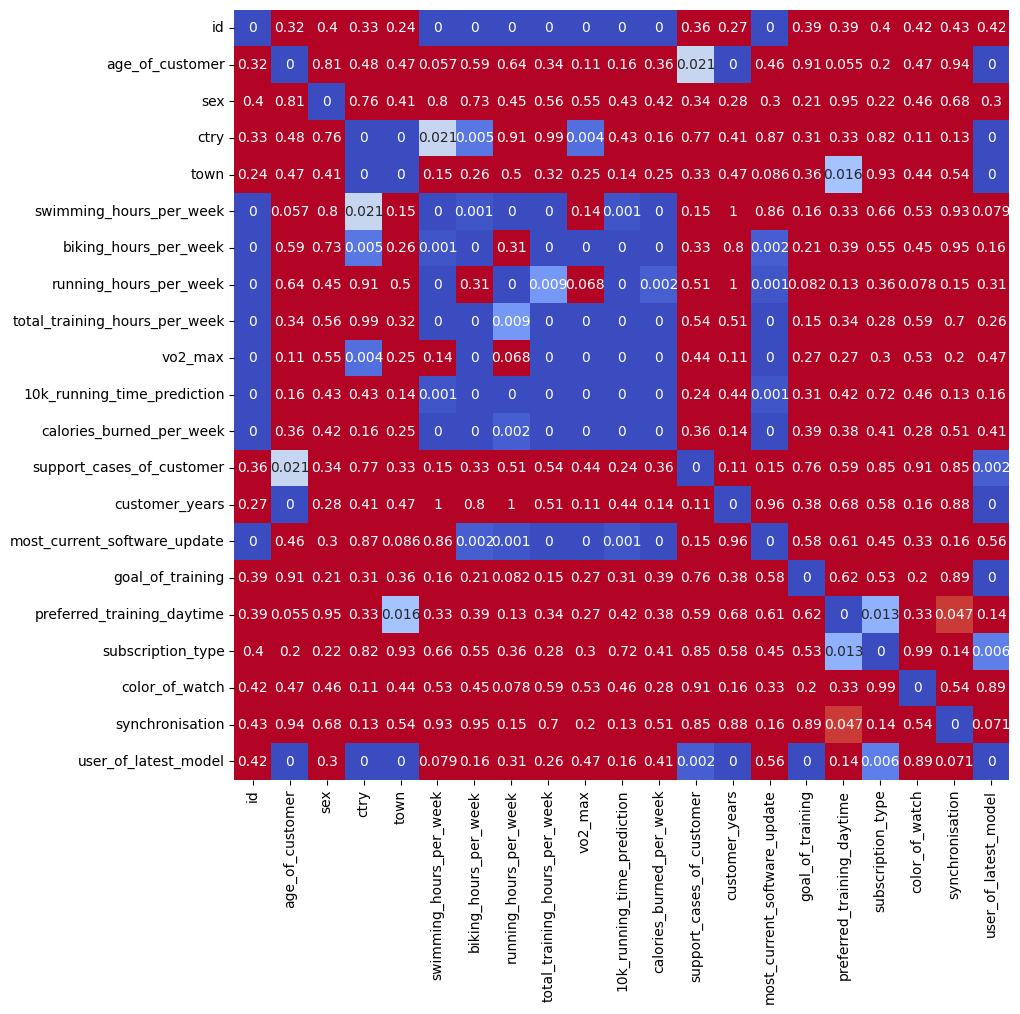

In [206]:
import seaborn as sns
#display chi2 p-values as a color coded heatmap with a threshold of 0.05, round p-values to 2 digits
plt.figure(figsize=(10,10))
sns.heatmap(round(chi2_values.astype(float),3), annot=True, cmap='coolwarm', cbar=False, vmin=0, vmax=0.05)


In [207]:
# Missing values in percentage
_df_category = df[category_columns]
prc_missing_values = _df_category.isna().sum()/len(df)*100

print("Percentage of missing values per columns")
print(prc_missing_values)
print()

Percentage of missing values per columns
sex                           0.000000
ctry                          0.000000
town                          3.987730
goal_of_training              2.862986
preferred_training_daytime    2.453988
subscription_type             0.102249
color_of_watch                3.271984
dtype: float64



In [208]:
for col in prc_missing_values.index:
    if prc_missing_values[col] > 0 and prc_missing_values[col] <= 5:
        print("Impute missing values in column: ", col, " with mode")
        df[col] = df[col].fillna(df[col].mode()[0])

Impute missing values in column:  town  with mode
Impute missing values in column:  goal_of_training  with mode
Impute missing values in column:  preferred_training_daytime  with mode
Impute missing values in column:  subscription_type  with mode
Impute missing values in column:  color_of_watch  with mode


<Axes: >

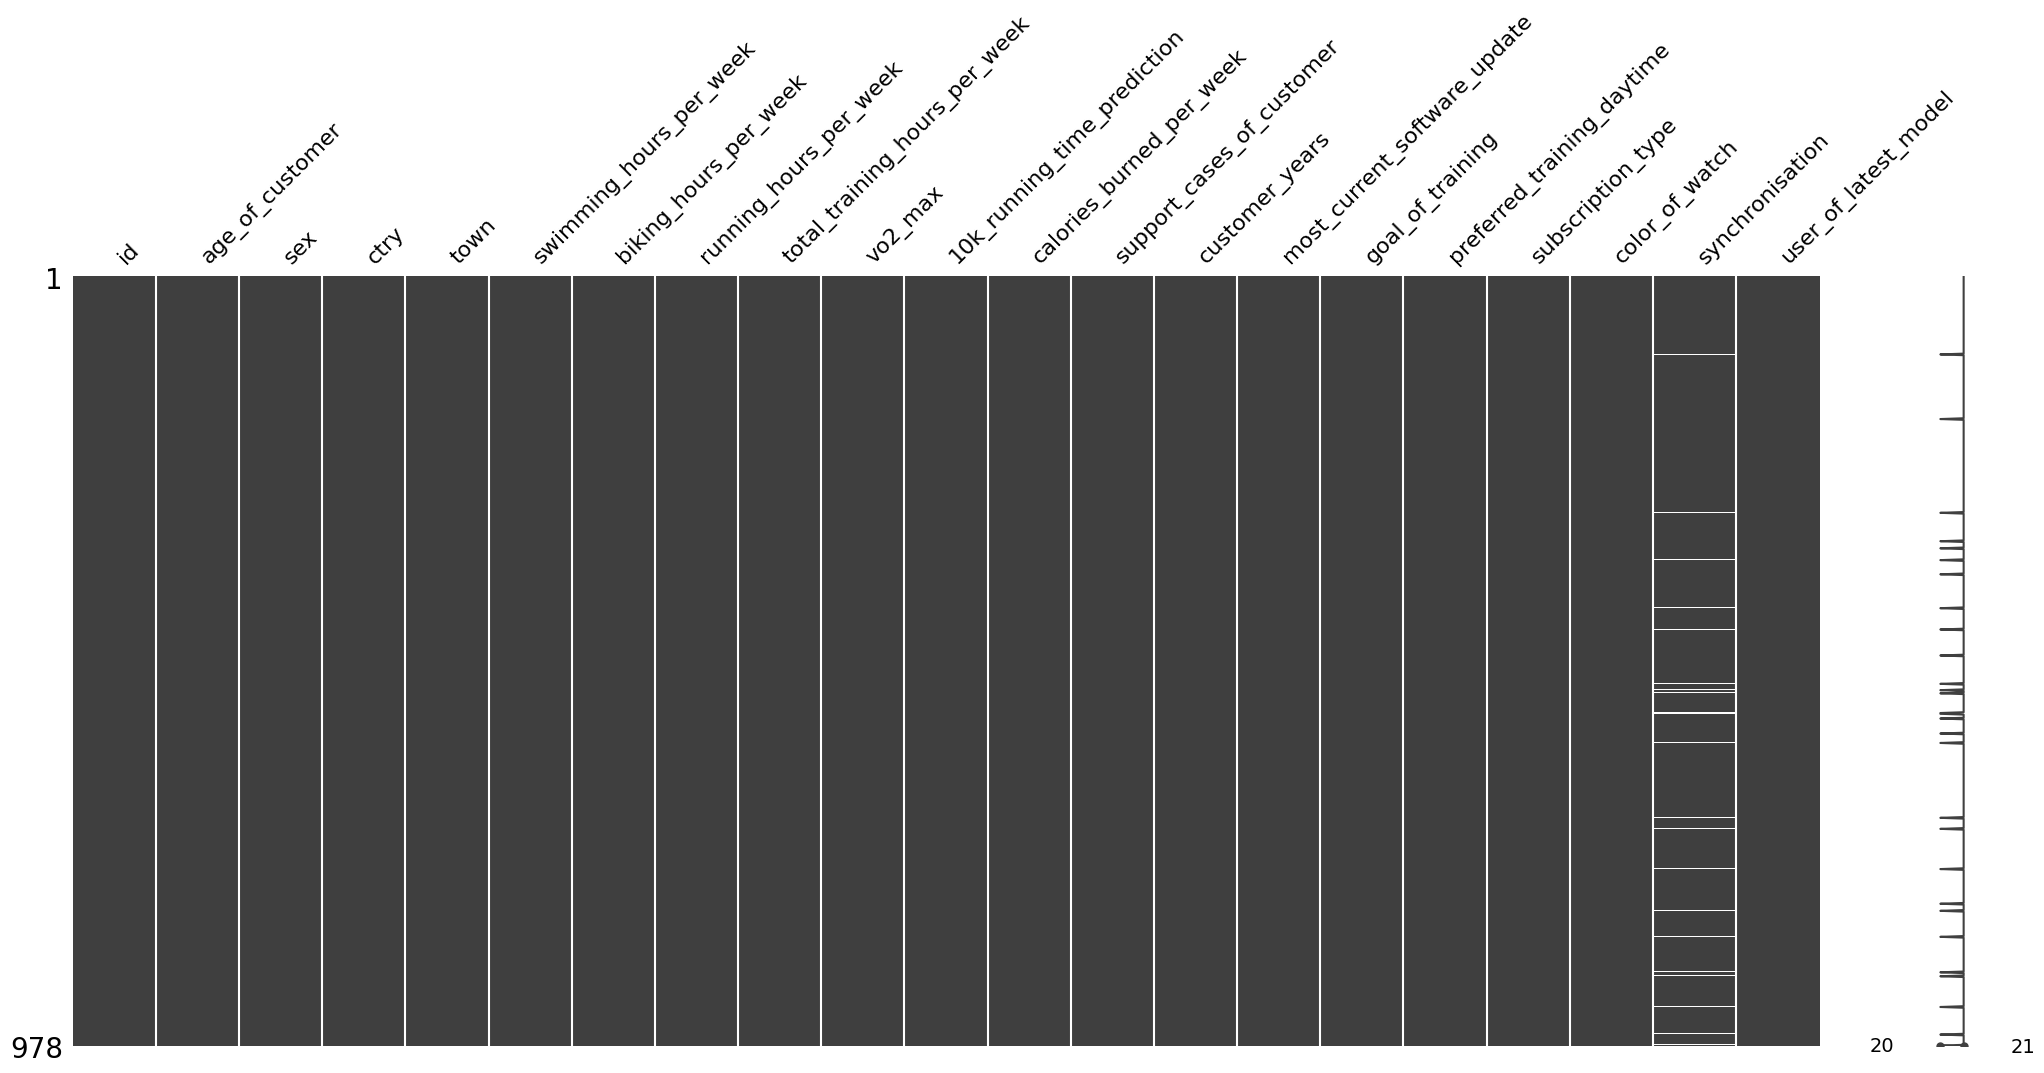

In [209]:
msno.matrix(df)

### Imputation using Predictive Model for column `synchronization`

In [210]:
from sklearn.linear_model import LogisticRegression

predective_model = {'synchronisation': ['age_of_customer']}

for target, pred_cols in predective_model.items():
    print("Impute missing values in column: ", target, " with Logsitic Regression")
    _df = df[[target]+ pred_cols].dropna()
    X, y = _df[pred_cols], _df[target].astype(bool)
    model = LogisticRegression()
    model.fit(X, y)
    df[target] = np.where(df[target].isnull(), model.predict(df.filter(pred_cols)), df[target])

Impute missing values in column:  synchronisation  with Logsitic Regression


<Axes: >

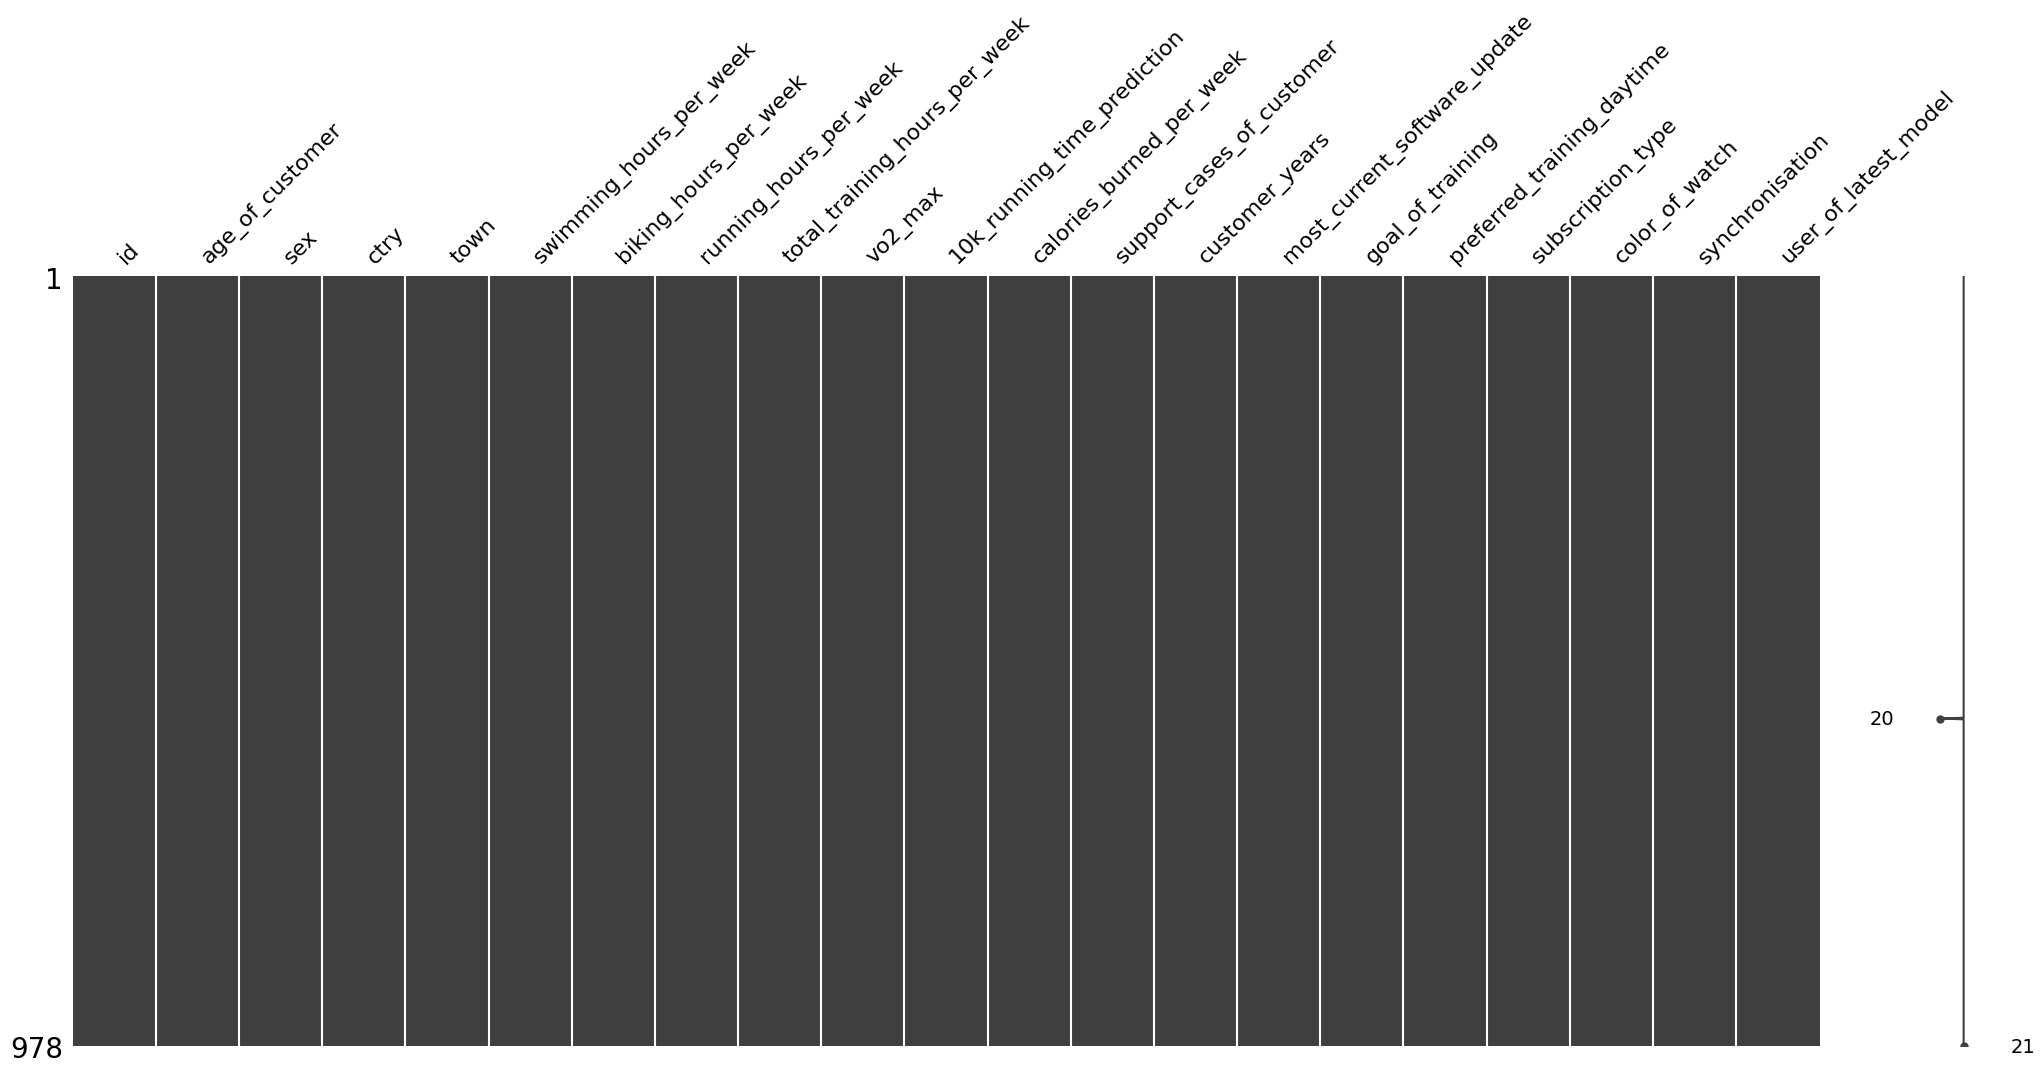

In [211]:
msno.matrix(df)

In [212]:
# Normality check for numeric columns 
# Shapiro-Wilk Test
from scipy.stats import shapiro
from sklearn.preprocessing import QuantileTransformer

def shapiro_wilk_test(data,alpha):
    stat, p = shapiro(data)
    print('\tStatistics=%.3f, p=%.5f' % (stat, p))
    # interpret
    if p > alpha:
        print('\tSample looks Gaussian (fail to reject H0)')
        return True
    else:
        print('\tSample does not look Gaussian (reject H0)')
        return False

alpha = 0.05
numeric_columns_gaussian_check = {}
for col in numeric_columns:
    print("Normality test for column: ", col)
    numeric_columns_gaussian_check[col] = shapiro_wilk_test(df[col],alpha)    
    
# Quantile Transformation
for col in numeric_columns:
    if numeric_columns_gaussian_check[col] == False:
        print("Transforming column: ", col)
        n_quantiles = int(np.sqrt(len(df[col])))
        qt = QuantileTransformer(n_quantiles=n_quantiles, 
                                 output_distribution='normal',
                                 random_state=0)
        
        trans_x=qt.fit_transform(np.array(df[col].array.reshape(-1, 1)))
        df[f'{col}_transformed']=trans_x


Normality test for column:  age_of_customer
	Statistics=0.964, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  swimming_hours_per_week
	Statistics=0.964, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  biking_hours_per_week
	Statistics=0.972, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  running_hours_per_week
	Statistics=0.969, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  total_training_hours_per_week
	Statistics=0.977, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  vo2_max
	Statistics=0.941, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  10k_running_time_prediction
	Statistics=0.961, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for column:  calories_burned_per_week
	Statistics=0.981, p=0.00000
	Sample does not look Gaussian (reject H0)
Normality test for colum

array([[<Axes: title={'center': 'age_of_customer_transformed'}>,
        <Axes: title={'center': 'swimming_hours_per_week_transformed'}>,
        <Axes: title={'center': 'biking_hours_per_week_transformed'}>],
       [<Axes: title={'center': 'running_hours_per_week_transformed'}>,
        <Axes: title={'center': 'total_training_hours_per_week_transformed'}>,
        <Axes: title={'center': 'vo2_max_transformed'}>],
       [<Axes: title={'center': '10k_running_time_prediction_transformed'}>,
        <Axes: title={'center': 'calories_burned_per_week_transformed'}>,
        <Axes: title={'center': 'support_cases_of_customer_transformed'}>],
       [<Axes: title={'center': 'customer_years_transformed'}>, <Axes: >,
        <Axes: >]], dtype=object)

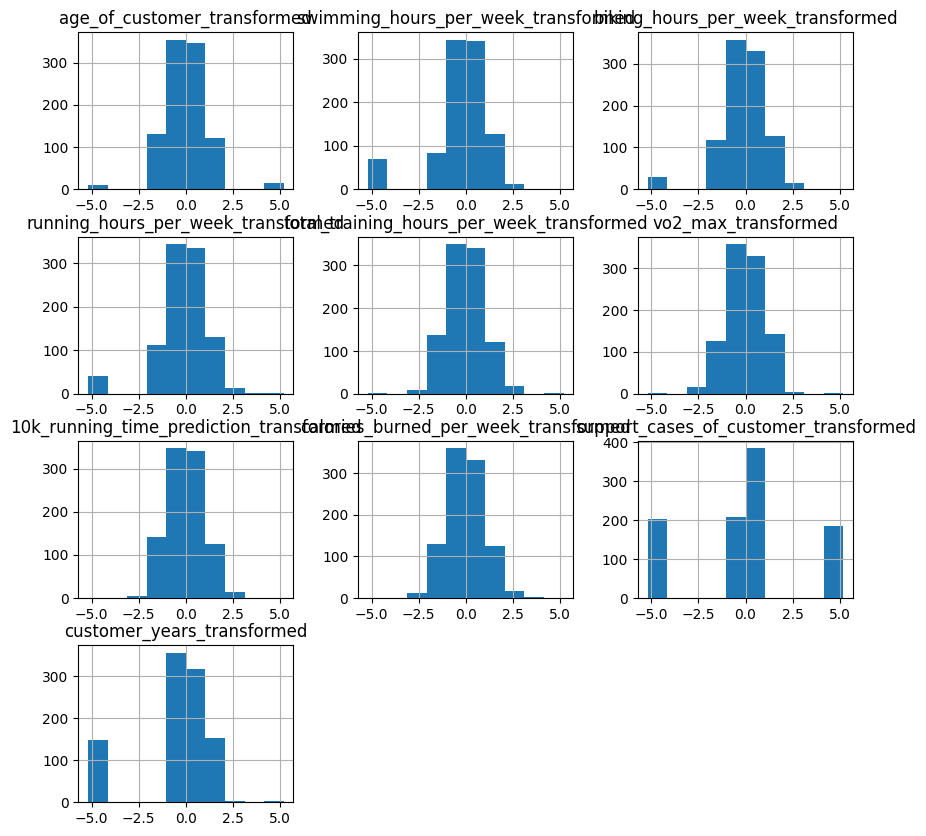

In [213]:
transformed_columns = [col for col in df.columns if 'transformed' in col]
df.filter(transformed_columns).hist(figsize=(10,10))

<Axes: >

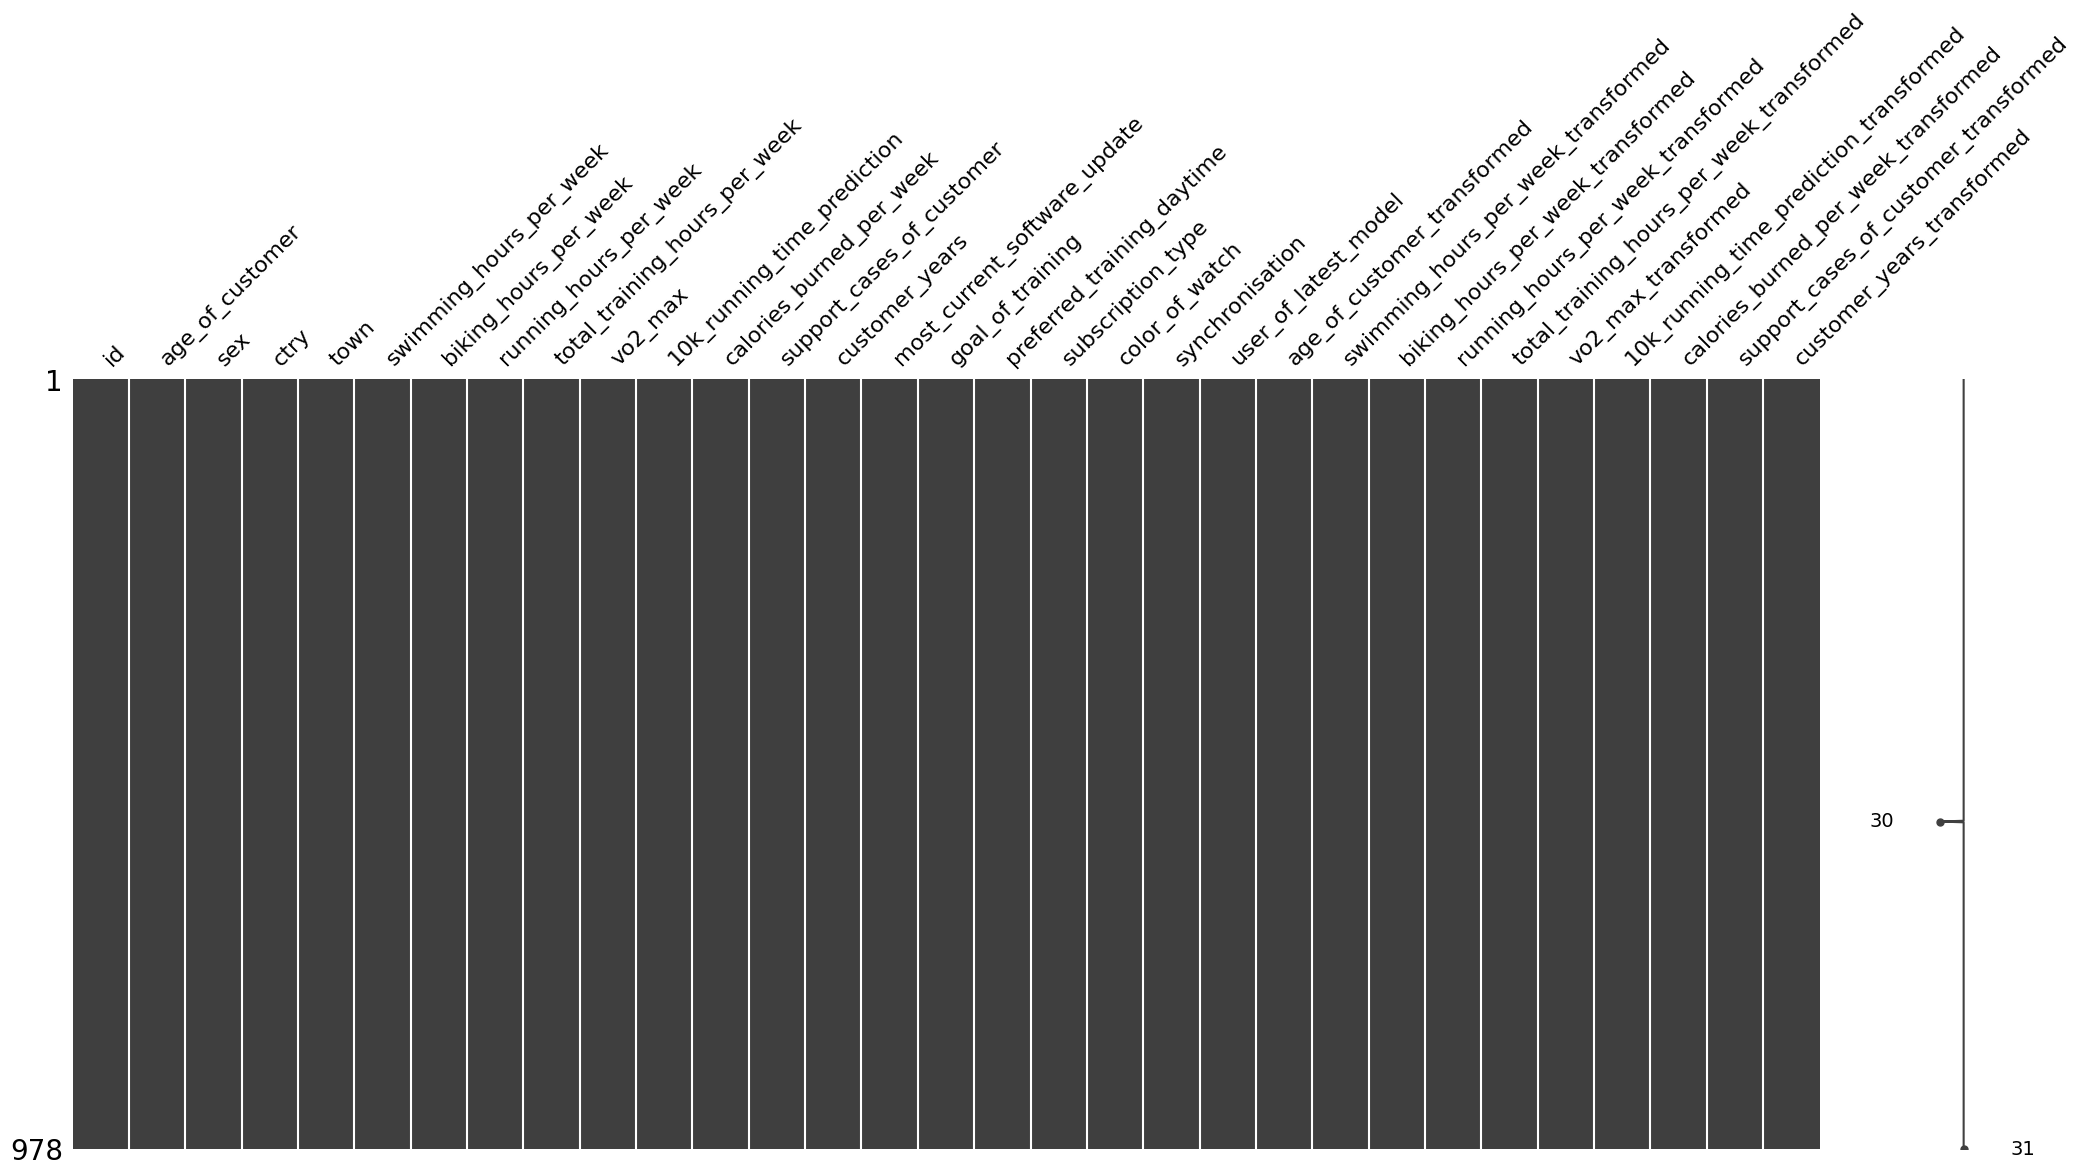

In [214]:
msno.matrix(df)

In [ ]:
#!pip install ydata_profiling

In [65]:
# from ydata_profiling import ProfileReport
# df = pd.read_csv("../../data/raw/triathlon_watch_training_data_final.csv")
# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file("EDA_Report.html")

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x125726020>
Traceback (most recent call last):
  File "/Users/JOHTORR/.pyenv/versions/3.12.7/lib/python3.12/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 155.28it/s]
